The calculated mean of my monte carlo is -1.0578961375132747
The standard deviation of my monte carlo is 1.9689887965908177


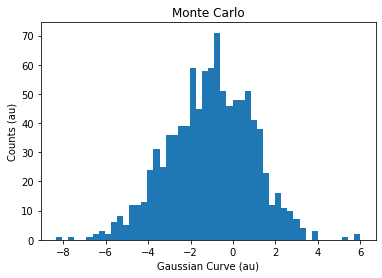

In [23]:
#Monte Carlo
from random import random
from random import seed
import math
from matplotlib import pyplot as plt
import statistics
mean=-1
sigma=2
zlist=[]
def xeq(q, theta):
        #seed(1)
        #q= random()
        #theta= 2*(math.pi)*(random())
        r= (-2*(sigma**2)*math.log(1-q))**(1/2)
        x= r*(math.cos(theta)) 
        y= r*(math.sin(theta))
        return x
for i in range(1000):
    q=random()
    theta= 2*(math.pi)*(random())
    z=(xeq(q,theta))+mean
    zlist.append(z)
#print(zlist)
plt.hist(x=zlist, bins=50)
plt.ylabel('Counts (au)')
plt.xlabel('Gaussian Curve (au)')
plt.title('Monte Carlo')
size=len(zlist)
suma= sum((zlist))
#checking mean
mean1= sum(zlist)/len(zlist)
print("The calculated mean of my monte carlo is", mean1)
#checking the std dev.
stddev= statistics.stdev(zlist)
print("The standard deviation of my monte carlo is",stddev)



1000 1000 1000


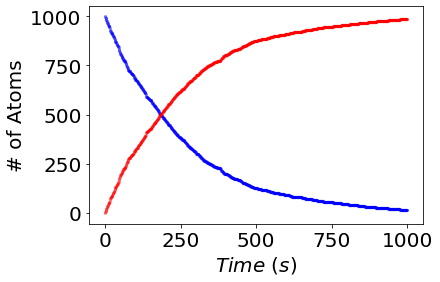

In [19]:
#Code from Class. Next Cell has my actual work!

from random import random
from numpy import arange
from matplotlib import pyplot as plt

# Constants
NTl = 1000            #  # of Thalium Atoms
NPb = 0               #  # or Lead atoms
tau = 3.053*60        #  Half-life of Thalium in Seconds
h = 1.0               #  Size of the time step in Seconds
p = 1 - 2**(-h/tau)   #  Probability of decay in one step
tmax = 1000           #  Total Time
#create lists of atoms
tpoints = arange(0.0,tmax,h)
TLpoints = []
PBpoints = []

# Main loop
for t in tpoints:
    TLpoints.append(NTl)
    PBpoints.append(NPb)
    # calculate the number of atoms that decay
    decay = 0
    for i in range(NTl):
        if random() < p:
            decay += 1
    NTl -= decay
    NPb += decay

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(tpoints,TLpoints,s=5,c='b',alpha=0.3)
ax.scatter(tpoints,PBpoints,s=5,c='r',alpha=0.3)
ax.set_xlabel("$Time$ $(s)$",size=20)
ax.set_ylabel("# of Atoms",size=20)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
#ax.legend()
print (len(tpoints), len(TLpoints), len(PBpoints))


10000
The final amount of Bi 213 atoms= 74 , the final amount of Pb atoms = 4 , the final amount of Ti atoms= 1 , and lastly the final amount of Bi 209 atoms= 9921


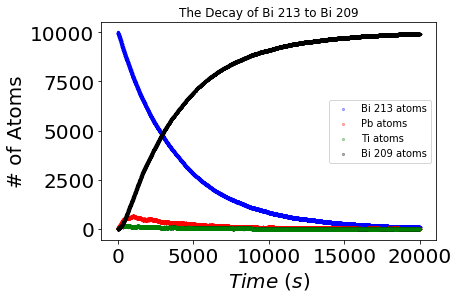

In [18]:
from random import random
from numpy import arange
from matplotlib import pyplot as plt

# Constants
NBI213=10000        #number of Bi213 atoms
NTi=0                #initial Ti atoms
NPb=0                  #initial Pb Atoms
#NTi_a =            #  # of Ti Atoms
#NPb_a = 0               #  # or Pb atoms after Bi213 decay
NBI209 = 0            #  # of Bi 209 Atoms
#NPb_b = PBpoints[-1]              #  # or Lead atoms
h = 1.0               #  Size of the time step in Seconds

tau_a=46*60            #half life of Bi213 in seconds
m=1-2**(-h/tau_a)    #probability of decay in one step 

tau_b = 2.2*60        #  Half-life of Ti in Seconds
p = 1 - 2**(-h/tau_b)   #  Probability of decay in one step


tau_c = 3.3*60        #  Half-life of Pb  in Seconds
q = 1 - 2**(-h/tau_c)   #  Probability of decay in one step

tmax = 20000           #  Total Time

#create lists of atoms 
Bi213points = []
PBpoints = []
PB_apoints=[]
PB_bpoints=[]
TIpoints = []
TI_apoints=[]
BI209points = []
tpoints = arange(0.0,tmax,h)



for t in tpoints:
# Bi213  main loop
    Bi213points.append(NBI213)
    PBpoints.append(NPb)
    TIpoints.append(NTi)
    BI209points.append(NBI209)
    # calculate the number of atoms that decay
    decay= 0
    for i in range(NBI213):
        g=random()  #this random will be to determine which route of decay
        if random() < m:
            decay += 1
    NBI213 -= decay
    if g< 0.3:
        NTi+=decay 
    if g>0.3:
        NPb+=decay 
    #Ti main loop
    # calculate the number of atoms that decay
    decay_a= 0
    for i in range(NTi):
        if random() < p:
            decay_a += 1
    NTi -= decay_a
    NPb += decay_a
    #final loop
    # calculate the number of atoms that decay
    decay_c = 0
    for i in range(NPb):
        if random() < q:
            decay_c += 1
    NPb -= decay_c
    NBI209 += decay_c
        
#print ( len(tpoints), len(Bi213points), len(PBpoints), len(TIpoints), len(BI209points))
print(Bi213points[-1]+PBpoints[-1]+TIpoints[-1]+BI209points[-1])
print("The final amount of Bi 213 atoms=", Bi213points[-1],", the final amount of Pb atoms =",PBpoints[-1],", the final amount of Ti atoms=",TIpoints[-1],", and lastly the final amount of Bi 209 atoms=",BI209points[-1])
#making the graph
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(tpoints,Bi213points,s=5,c='b',alpha=0.3,label='Bi 213 atoms')
ax.scatter(tpoints,PBpoints,s=5,c='r',alpha=0.3, label= 'Pb atoms')
ax.scatter(tpoints, TIpoints, s=5,c='g', alpha=0.3, label= 'Ti atoms')
ax.scatter(tpoints, BI209points, s=5, c='k', alpha=0.3, label= 'Bi 209 atoms')
ax.set_xlabel("$Time$ $(s)$",size=20)
ax.set_ylabel("# of Atoms",size=20)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.legend()
plt.title('The Decay of Bi 213 to Bi 209')
plt.show()
